# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1  -0.194346   1.171631
1           1      1  -0.136906   1.493444
2           2      1   0.103492  -0.570624
3           3      1   1.032033  -1.329842
4           4      0  -0.290103   0.627492


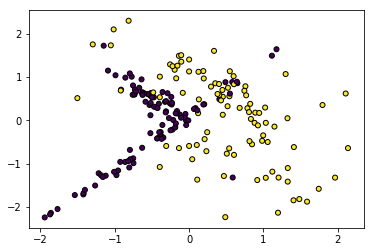

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'amrita95'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv(filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()


In [131]:
from sklearn import svm
from sklearn.model_selection import cross_val_score,GridSearchCV, StratifiedShuffleSplit
Y1 = Y1.reshape(200,)


C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(X1, Y1)



GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
grid.best_params_

{'C': 1.0, 'gamma': 10.0}

In [104]:
from sklearn.metrics import accuracy_score
from sklearn import svm
clf = svm.SVC(C=0.1,gamma='auto')
clf.fit(X1[:160],Y1[:160])
pred = clf.predict(X1[160:])
accuracy_score(Y1[160:],pred)

/home/amrita95/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9

In [107]:
filenameToReadT = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv(filenameToReadT)


testX1 = testing_df[['Feature 0','Feature 1']].values

pred = clf.predict(testX1)

In [121]:

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("gamma=10^%d, C=10^%d" % (np.log10(10), np.log10(0.1)),
          size='medium')

plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap=plt.cm.RdBu_r,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis('tight')


(-3.0, 3.0, -3.0, 3.0)

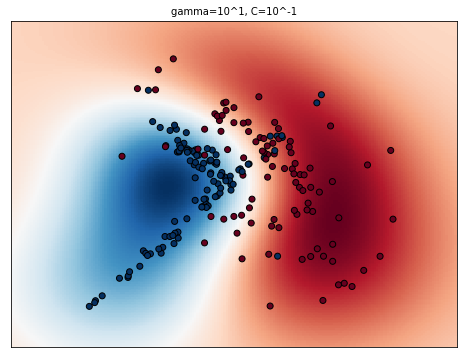

In [122]:
plt.show()

In [129]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 4, 200))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("gamma=10^%d, C=10^%d" % (np.log10(10), np.log10(0.1)),
          size='medium')

plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(testX1[:, 0], testX1[:, 1], c=pred, cmap=plt.cm.RdBu_r,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis('tight')


(-3.0, 3.0, -3.0, 4.0)

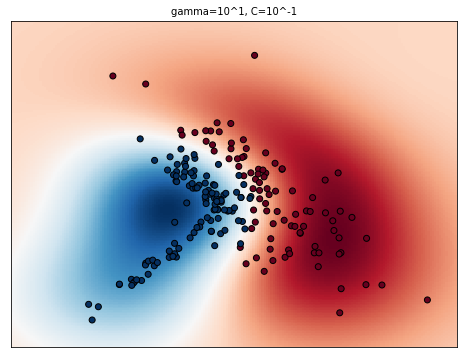

In [130]:
plt.show()

In [132]:
testing_df['Class'] = pred

In [133]:
testing_df.head()

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,1,0.428542,0.738597
1,1,0,-0.770311,0.769582
2,2,1,-0.039042,1.261099
3,3,0,-0.524402,1.055386
4,4,0,-0.274202,0.490807


In [137]:
testing_df.to_csv('5challenge_testing_amrita95.csv')

In [136]:
testing_df.drop(['Unnamed: 0'],axis =1 )

,Class,Feature 0,Feature 1
0,1,0.428542,0.738597
1,0,-0.770311,0.769582
2,1,-0.039042,1.261099
3,0,-0.524402,1.055386
4,0,-0.274202,0.490807
5,0,-0.258045,-0.819003
6,0,-1.241182,-1.566675
7,0,-0.633918,0.098523
8,0,-0.320517,0.285503
9,0,-0.661325,0.760031
